In [1]:
import dlib, cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as path_effects

detector = dlib.get_frontal_face_detector()
sp = dlib.shape_predictor('models/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('models/dlib_face_recognition_resnet_model_v1.dat')

In [2]:
def find_faces(img):
    dets = detector(img, 1)

    if len(dets) == 0:
        return np.empty(0), np.empty(0), np.empty(0)
    
    rects, shapes = [], []
    shapes_np = np.zeros((len(dets), 68, 2), dtype=np.int)
    for k, d in enumerate(dets):
        rect = ((d.left(), d.top()), (d.right(), d.bottom()))
        rects.append(rect)

        shape = sp(img, d)
        
        # convert dlib shape to numpy array
        for i in range(0, 68):
            shapes_np[k][i] = (shape.part(i).x, shape.part(i).y)

        shapes.append(shape)
        
    return rects, shapes, shapes_np

def encode_faces(img, shapes):
    face_descriptors = []
    for shape in shapes:
        face_descriptor = facerec.compute_face_descriptor(img, shape)
        face_descriptors.append(np.array(face_descriptor))

    return np.array(face_descriptors)

In [3]:
img_paths = {
    'minsu': 'img/minsu-2.jpg',
}

descs_minsu = {
    'minsu': None,
}

for name, img_path in img_paths.items():
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    _, img_shapes, _ = find_faces(img_rgb)
    descs_minsu[name] = encode_faces(img_rgb, img_shapes)[0]

np.save('img/descs_minsu.npy', descs_minsu)
print(descs_minsu)

{'minsu': array([-0.07549869,  0.07377142, -0.03926225, -0.0489014 , -0.01810493,
       -0.02099542, -0.03213722, -0.11505616,  0.19160894, -0.06897271,
        0.26057377, -0.06028408, -0.24699026, -0.04615877, -0.0209094 ,
        0.12258089, -0.13077384, -0.04627931, -0.06003104,  0.00212854,
        0.07602192,  0.01740344,  0.02004047,  0.1322796 , -0.07769144,
       -0.28975904, -0.14059004, -0.1596462 ,  0.04402149, -0.07639621,
       -0.08584619,  0.01370883, -0.10257116, -0.0329911 ,  0.02623208,
        0.00553654, -0.05324707, -0.04109916,  0.24947292,  0.00358238,
       -0.19228387, -0.03567726,  0.04551808,  0.21048328,  0.16630894,
        0.04527749, -0.00278759, -0.12888493,  0.10555412, -0.13342829,
        0.04676781,  0.13694684,  0.13910991,  0.09261043,  0.02587473,
       -0.19101867, -0.01787837,  0.1111274 , -0.1913635 ,  0.0106728 ,
       -0.01027953, -0.0595265 , -0.04768605, -0.0434608 ,  0.25194058,
        0.10012599, -0.15451504, -0.14629766,  0.18031

In [6]:
#img_bgr = cv2.imread('img/minsu-test-2.jpg')
img_bgr = cv2.imread('img/sibar.jpg')
#img_bgr = cv2.imread('img/minsu-3.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

rects, shapes, _ = find_faces(img_rgb)
descriptors = encode_faces(img_rgb, shapes)

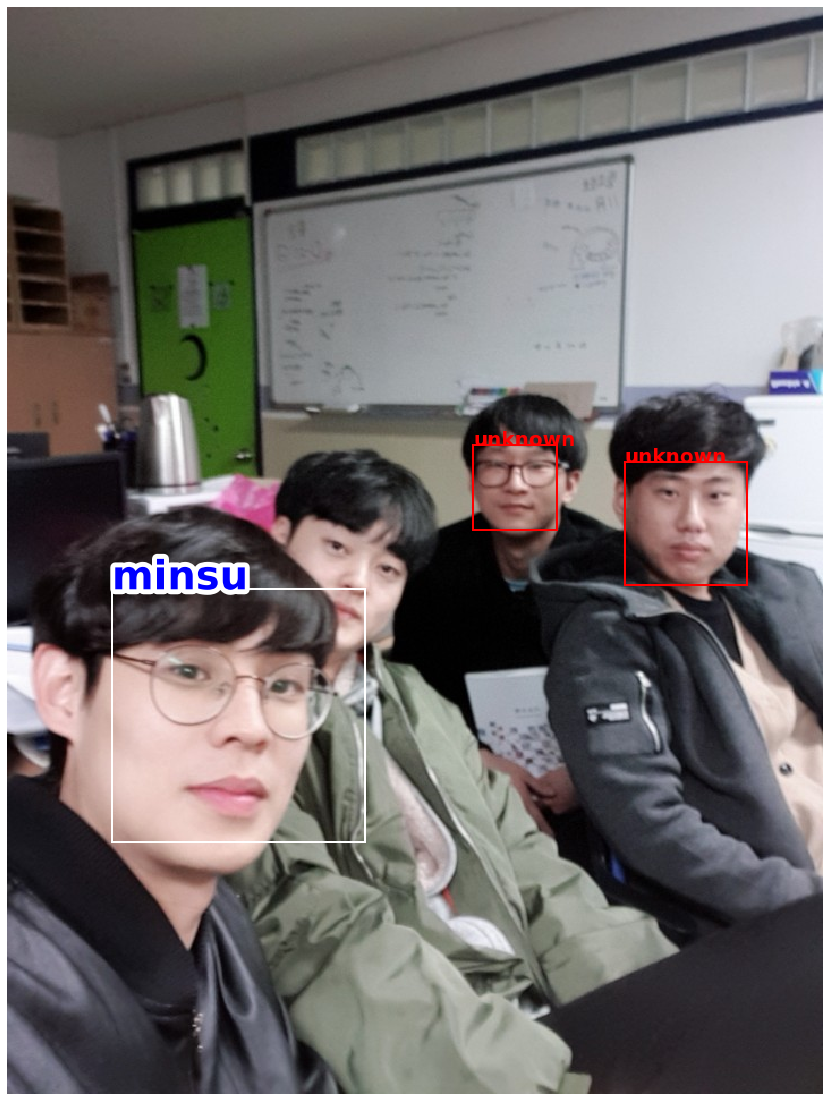

In [7]:
fig, ax = plt.subplots(1, figsize=(20, 20))
ax.imshow(img_rgb)

for i, desc in enumerate(descriptors):
    found = False
    for name, saved_desc in descs_minsu.items():
        dist = np.linalg.norm([desc] - saved_desc, axis=1)

        if dist < 0.6:
            found = True

            text = ax.text(rects[i][0][0], rects[i][0][1], name,
                    color='b', fontsize=40, fontweight='bold')
            text.set_path_effects([path_effects.Stroke(linewidth=10, foreground='white'), path_effects.Normal()])
            rect = patches.Rectangle(rects[i][0],
                                 rects[i][1][1] - rects[i][0][1],
                                 rects[i][1][0] - rects[i][0][0],
                                 linewidth=2, edgecolor='w', facecolor='none')
            ax.add_patch(rect)

            break
    
    if not found:
        ax.text(rects[i][0][0], rects[i][0][1], 'unknown',
                color='r', fontsize=20, fontweight='bold')
        rect = patches.Rectangle(rects[i][0],
                             rects[i][1][1] - rects[i][0][1],
                             rects[i][1][0] - rects[i][0][0],
                             linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

plt.axis('off')
plt.savefig('result/output_minsu.png')
plt.show()